# Problem Statement:
This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 

Independent Variables:

- Loan_ID

- Gender

- Married

- Dependents

- Education

- Self_Employed

- ApplicantIncome

- CoapplicantIncome

- Loan_Amount

- Loan_Amount_Term

- Credit History

- Property_Area

Dependent Variable (Target Variable):

- Loan_Status

You have to build a model that can predict whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset. 

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [47]:
data = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv')
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [8]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

Male      489
Female    112
Name: Gender, dtype: int64


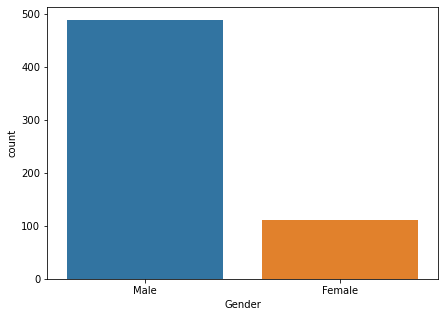

In [10]:
plt.figure(figsize=(7,5))
ax= sns.countplot(x='Gender',data = data)
print(data['Gender'].value_counts())

clearly males are more in no 

Yes    398
No     213
Name: Married, dtype: int64


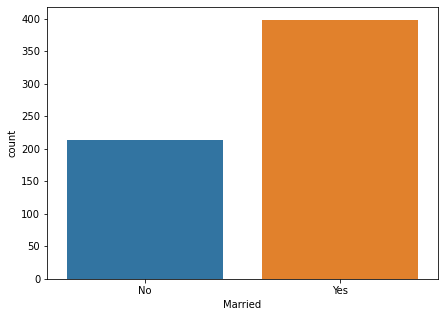

In [17]:
plt.figure(figsize=(7,5))
ax= sns.countplot(x='Married',data = data)
print(data['Married'].value_counts())

Married people are more in no's

Graduate        480
Not Graduate    134
Name: Education, dtype: int64


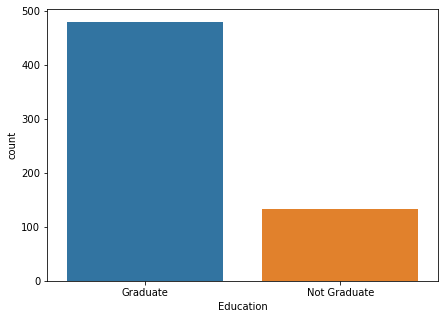

In [18]:
plt.figure(figsize=(7,5))
ax= sns.countplot(x='Education',data = data)
print(data['Education'].value_counts())

Gradutaes are more in no's than Not Graduate

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64


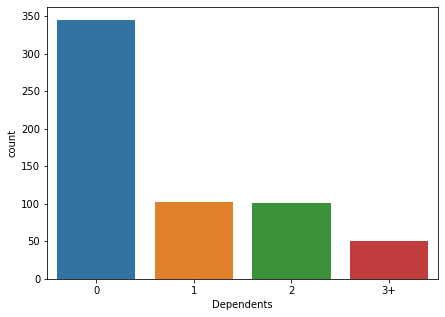

In [20]:
plt.figure(figsize=(7,5))
ax= sns.countplot(x='Dependents',data = data)
print(data['Dependents'].value_counts())

there are more no of people who are independents

No     500
Yes     82
Name: Self_Employed, dtype: int64


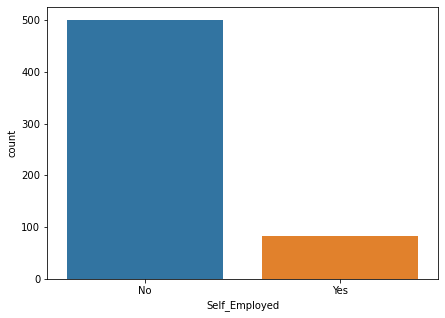

In [21]:
plt.figure(figsize=(7,5))
ax= sns.countplot(x='Self_Employed',data = data)
print(data['Self_Employed'].value_counts())

there are about 500 people who are not employed

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64


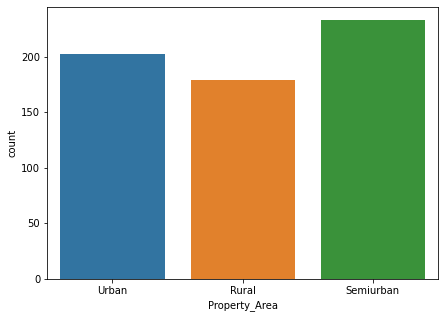

In [22]:
plt.figure(figsize=(7,5))
ax= sns.countplot(x='Property_Area',data = data)
print(data['Property_Area'].value_counts())

people are lives in all types of area but more in semiurban property

Y    422
N    192
Name: Loan_Status, dtype: int64


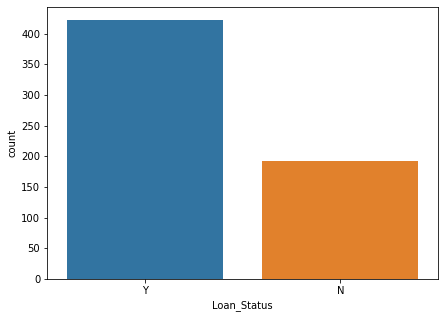

In [23]:
plt.figure(figsize=(7,5))
ax= sns.countplot(x='Loan_Status',data = data)
print(data['Loan_Status'].value_counts())

the Loan satus for people is higher who got the loan from the bank or etc

<AxesSubplot:xlabel='ApplicantIncome'>

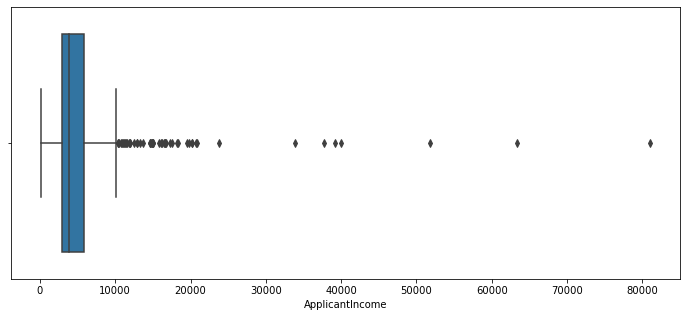

In [28]:
plt.figure(figsize=(12,5))
sns.boxplot('ApplicantIncome',data=data)

Its the applicant salary and it can be vary from person to person so we cant say these are the outliers

<AxesSubplot:xlabel='CoapplicantIncome'>

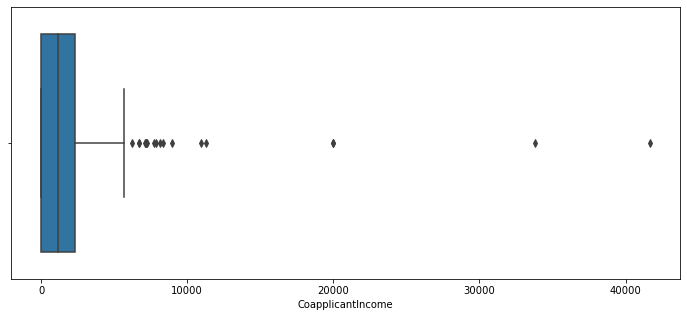

In [29]:
plt.figure(figsize=(12,5))
sns.boxplot('CoapplicantIncome',data=data)

Its the COapplicant salary and it can be vary from person to person so we cant say these are the outliers

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64


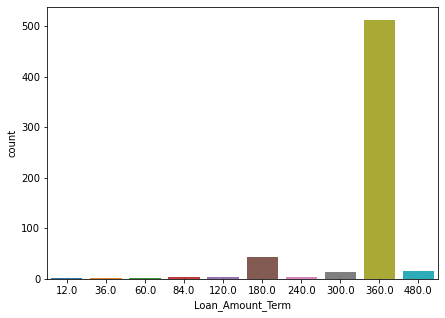

In [30]:
plt.figure(figsize=(7,5))
ax= sns.countplot(x='Loan_Amount_Term',data = data)
print(data['Loan_Amount_Term'].value_counts())

Therre are max people who took Loan for the term of 360 days

1.0    475
0.0     89
Name: Credit_History, dtype: int64


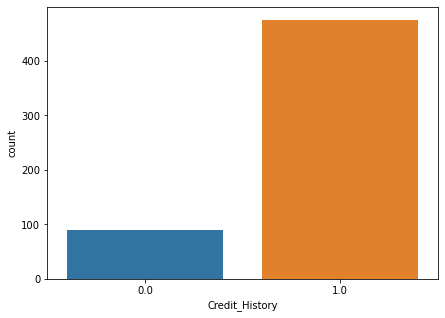

In [31]:
plt.figure(figsize=(7,5))
ax= sns.countplot(x='Credit_History',data = data)
print(data['Credit_History'].value_counts())

Therre are about more than 450 people who have Loan Credit History -who took the loan before too

In [32]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


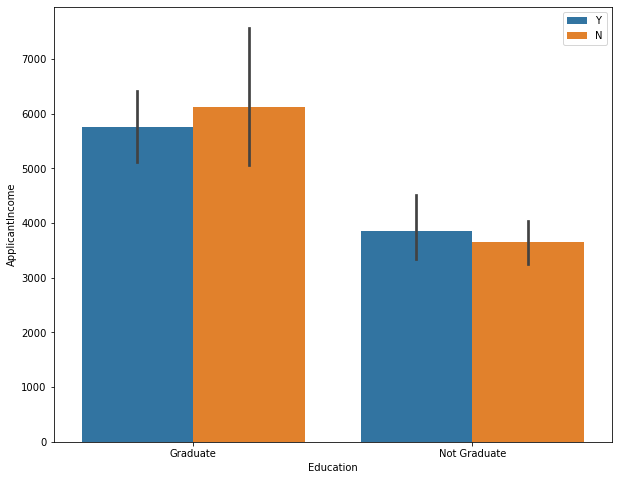

In [36]:
plt.figure(figsize=(10,8))
sns.barplot('Education','ApplicantIncome',hue='Loan_Status',data=data)
plt.legend()

The people who are graduated and if Income is greater thn the 6000 then the loan can be available but under this income loan cannot be easily available

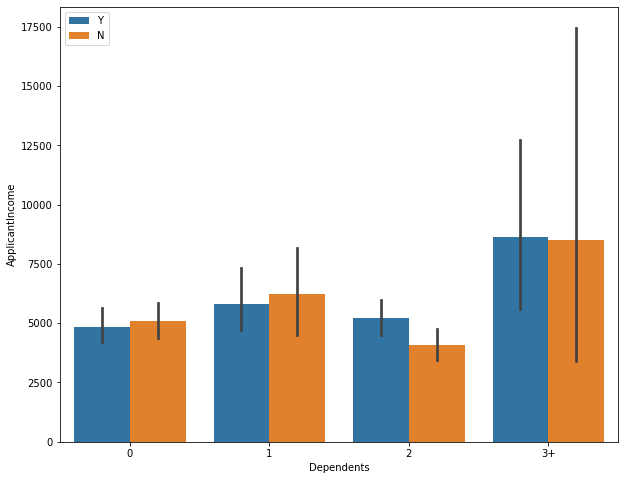

In [37]:
plt.figure(figsize=(10,8))
sns.barplot('Dependents','ApplicantIncome',hue='Loan_Status',data=data)
plt.legend()

Those People who are 3+ dependents and having salary mpore than 10000 thn loan can be available but for independents if salary i more than 5000 the loan will be available for them

In [38]:
from sklearn.preprocessing import LabelEncoder

In [48]:
le = LabelEncoder()
var_mode = ['Loan_ID','Gender','Married','Education','Self_Employed','Property_Area','Loan_Status']

for i in var_mode:
    data[i] = le.fit_transform(data[i])

In [49]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,5849,0.0,NaN,360.0,1.0,2,1
1,1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


In [82]:
data['Dependents'] = data['Dependents'].astype(int)

In [50]:
data.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Now Filling  nans wiht their means or with most occuring values

In [54]:
data['Dependents'] = data['Dependents'].fillna(1)

In [57]:
data['LoanAmount'] = data['LoanAmount'].fillna(data['LoanAmount'].mean())

In [59]:
data['Loan_Amount_Term'] = data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mean())

In [64]:
data['Credit_History'] = data['Credit_History'].fillna(1)

In [67]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

We fill nans and the data is categorical and in some columns the data is continous but we chk the outliers but the data might be outliers but the data is imp to us so we are not goinf remove the outliers

In [83]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    int32  
 1   Gender             614 non-null    int32  
 2   Married            614 non-null    int32  
 3   Dependents         614 non-null    int32  
 4   Education          614 non-null    int32  
 5   Self_Employed      614 non-null    int32  
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    int32  
 12  Loan_Status        614 non-null    int32  
dtypes: float64(4), int32(8), int64(1)
memory usage: 43.3 KB


In [84]:
data.corr()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,1.000000,-0.007403,-0.018621,0.054304,0.039442,0.005039,0.016925,0.039211,0.035684,-0.028945,-0.030603,-0.155416,0.011773
Gender,-0.007403,1.000000,0.336094,0.173872,0.024382,-0.025022,0.094472,0.073308,0.136081,-0.067778,-0.003844,-0.030903,0.008690
Married,-0.018621,0.336094,1.000000,0.336692,0.006759,-0.038153,0.052119,0.069877,0.145541,-0.096253,0.014896,0.007973,0.096657
Dependents,0.054304,0.173872,0.336692,1.000000,0.058955,0.020570,0.118075,0.026076,0.159585,-0.096833,-0.053448,0.008917,0.005593
Education,0.039442,0.024382,0.006759,0.058955,1.000000,-0.021130,-0.140760,-0.062290,-0.166998,-0.077242,-0.073658,-0.065243,-0.085884
Self_Employed,0.005039,-0.025022,-0.038153,0.020570,-0.021130,1.000000,0.095664,0.052218,0.089806,-0.036965,0.062019,-0.013439,0.010880
ApplicantIncome,0.016925,0.094472,0.052119,0.118075,-0.140760,0.095664,1.000000,-0.116605,0.565620,-0.045242,-0.018615,-0.009500,-0.004710
CoapplicantIncome,0.039211,0.073308,0.069877,0.026076,-0.062290,0.052218,-0.116605,1.000000,0.187828,-0.059675,0.011134,0.010522,-0.059187
LoanAmount,0.035684,0.136081,0.145541,0.159585,-0.166998,0.089806,0.565620,0.187828,1.000000,0.038801,-0.001431,-0.044776,-0.036416
Loan_Amount_Term,-0.028945,-0.067778,-0.096253,-0.096833,-0.077242,-0.036965,-0.045242,-0.059675,0.038801,1.000000,0.000432,-0.077620,-0.020974


<AxesSubplot:>

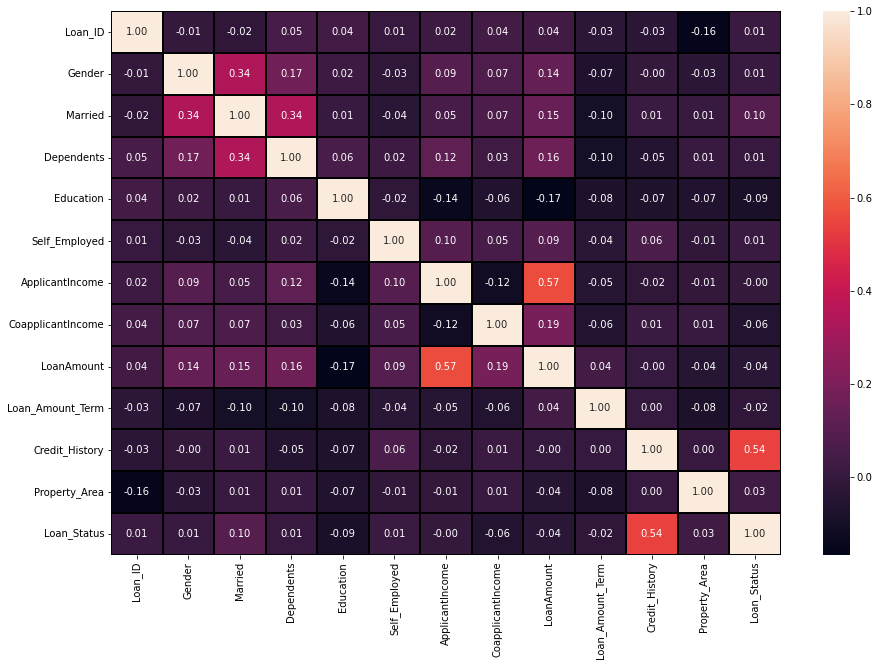

In [85]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),annot = True, linewidth = 0.1,linecolor='black',fmt='0.2f')

credit_history and loan status are highly correlated

Applicant income and loan amount looks correlated

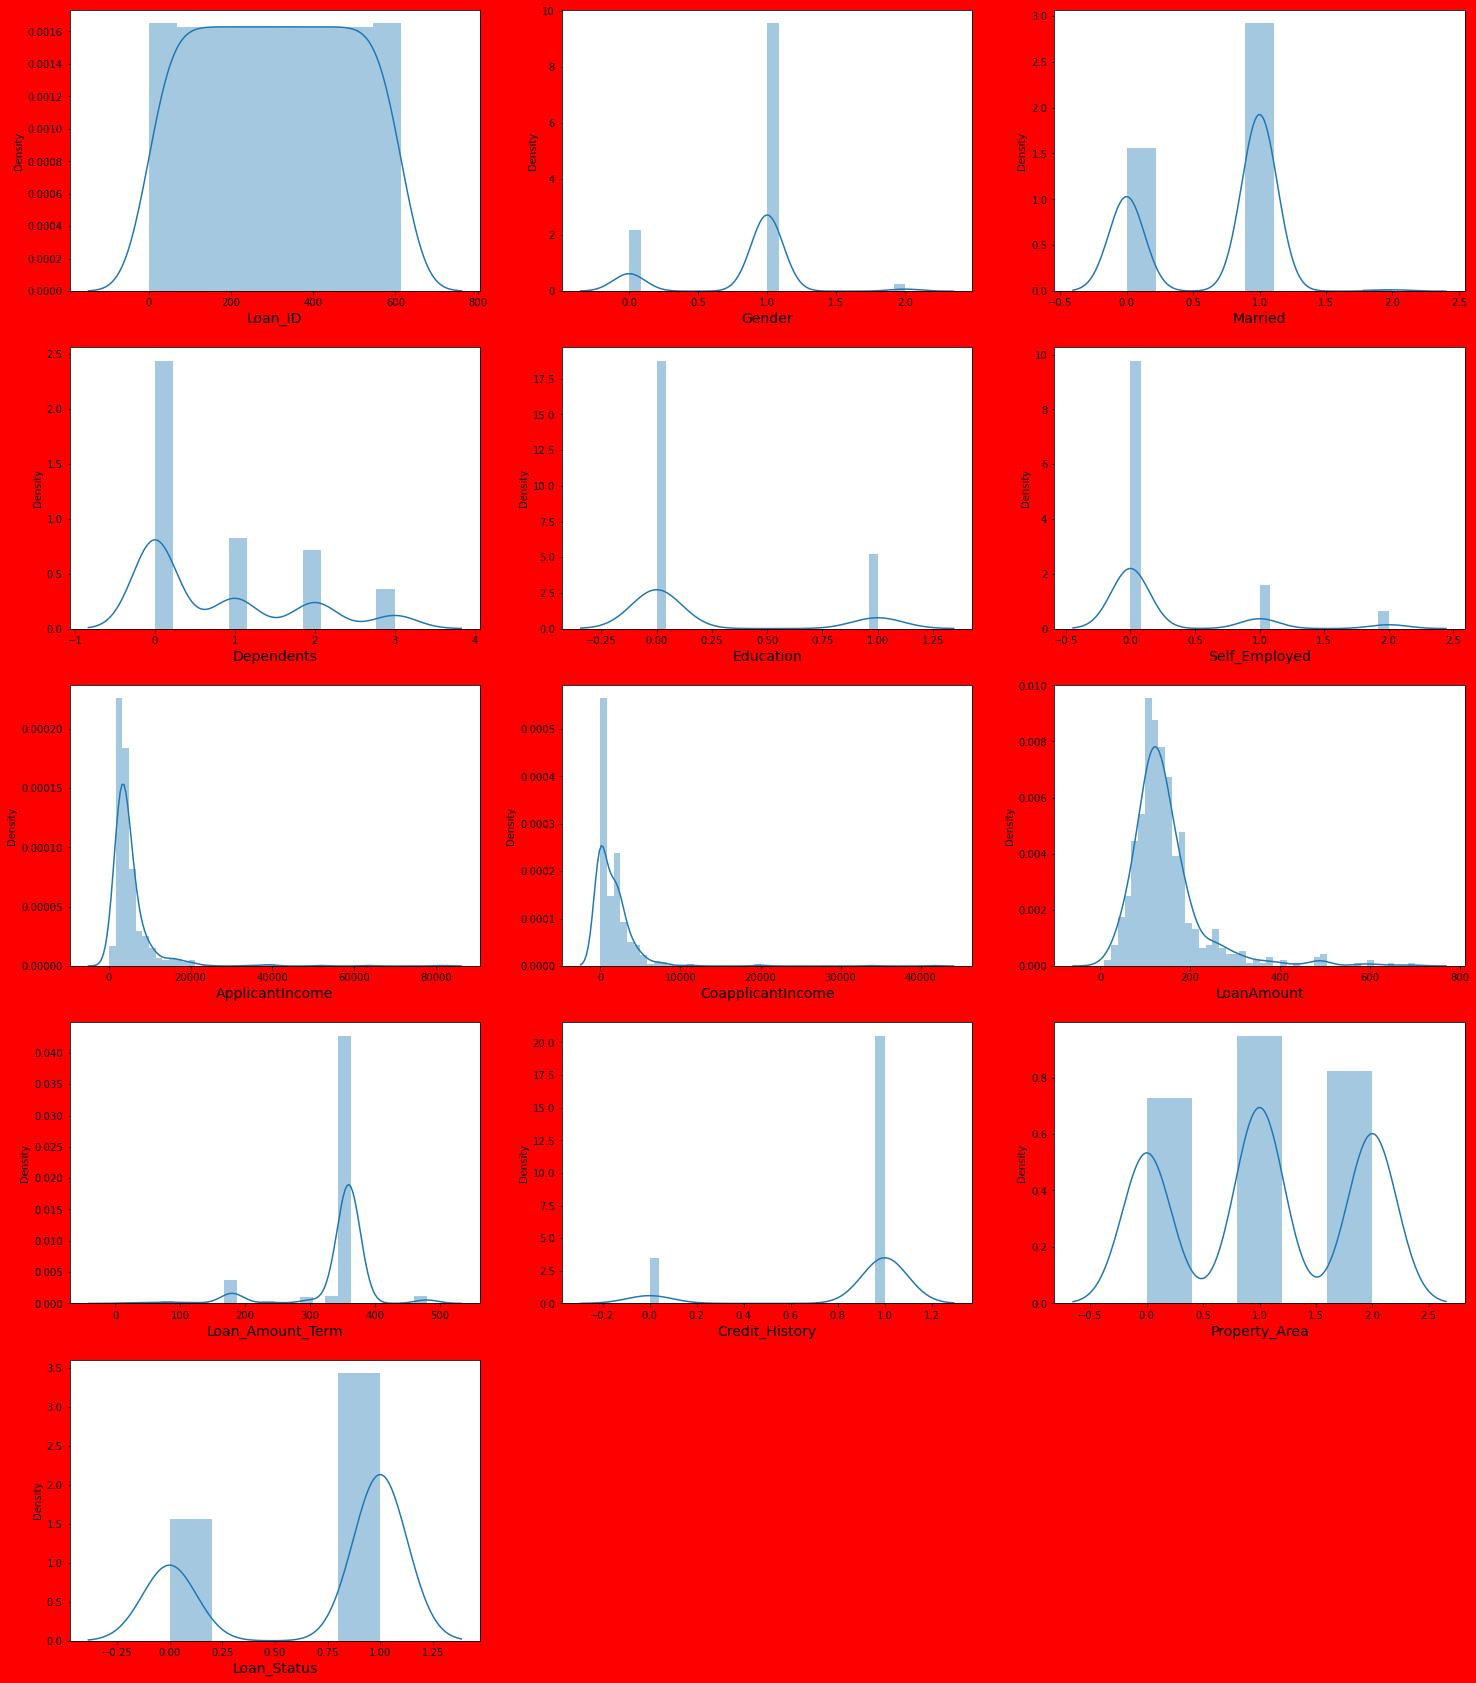

In [87]:
plt.figure(figsize = (25,30),facecolor = "red")
plotnumber = 1
for column in data:
    if plotnumber<=13:
        ax=plt.subplot(5,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=14)
        
    plotnumber+=1
plt.show()

There is so much skewness in the 3 continous columns i.e.-(ApplicantIncome,CoapplicantIncome,LoanAmount)

In [89]:
# now remove this right skewness from these continous columns

In [90]:
data_con = data[['ApplicantIncome','CoapplicantIncome','LoanAmount']].copy()

In [92]:
data_con

,ApplicantIncome,CoapplicantIncome,LoanAmount
0,5849,0.0,146.412162
1,4583,1508.0,128.000000
2,3000,0.0,66.000000
3,2583,2358.0,120.000000
4,6000,0.0,141.000000
...,...,...,...
609,2900,0.0,71.000000
610,4106,0.0,40.000000
611,8072,240.0,253.000000
612,7583,0.0,187.000000


In [94]:
data_con.skew()

ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.726601
dtype: float64

In [95]:
np.cbrt(data_con)

,ApplicantIncome,CoapplicantIncome,LoanAmount
0,18.017473,0.000000,5.270588
1,16.610522,11.467457,5.039684
2,14.422496,0.000000,4.041240
3,13.720654,13.310098,4.932424
4,18.171206,0.000000,5.204828
...,...,...,...
609,14.260431,0.000000,4.140818
610,16.013010,0.000000,3.419952
611,20.059821,6.214465,6.324704
612,19.646281,0.000000,5.718479


In [105]:
df = np.sqrt(data_con)

In [106]:
df.skew()

ApplicantIncome      2.967286
CoapplicantIncome    0.979561
LoanAmount           1.314162
dtype: float64

In [107]:
df

,ApplicantIncome,CoapplicantIncome,LoanAmount
0,76.478755,0.000000,12.100089
1,67.697858,38.832976,11.313708
2,54.772256,0.000000,8.124038
3,50.823223,48.559242,10.954451
4,77.459667,0.000000,11.874342
...,...,...,...
609,53.851648,0.000000,8.426150
610,64.078077,0.000000,6.324555
611,89.844310,15.491933,15.905974
612,87.080423,0.000000,13.674794


In [109]:
data_cat = data[['Loan_ID','Gender','Married','Dependents','Education','Self_Employed','Loan_Amount_Term','Credit_History','Property_Area','Loan_Status']].copy()

In [110]:
data_cat.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,360.0,1.0,2,1
1,1,1,1,1,0,0,360.0,1.0,0,0
2,2,1,1,0,0,1,360.0,1.0,2,1
3,3,1,1,0,1,0,360.0,1.0,2,1
4,4,1,0,0,0,0,360.0,1.0,2,1


In [111]:
datas = pd.concat([data_cat,df],axis=1)

In [112]:
datas.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,ApplicantIncome,CoapplicantIncome,LoanAmount
0,0,1,0,0,0,0,360.0,1.0,2,1,76.478755,0.000000,12.100089
1,1,1,1,1,0,0,360.0,1.0,0,0,67.697858,38.832976,11.313708
2,2,1,1,0,0,1,360.0,1.0,2,1,54.772256,0.000000,8.124038
3,3,1,1,0,1,0,360.0,1.0,2,1,50.823223,48.559242,10.954451
4,4,1,0,0,0,0,360.0,1.0,2,1,77.459667,0.000000,11.874342


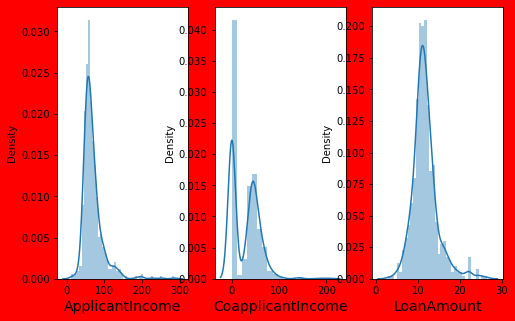

In [114]:
plt.figure(figsize = (8,5),facecolor = "red")
plotnumber = 1
for column in df:
    if plotnumber<=3:
        ax=plt.subplot(1,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=14)
        
    plotnumber+=1
plt.show()

# Now we removed the Skewness from these continous data now our data looks good and we are ready to build the model

In [115]:
# seprating the columns into features and target

x= data.drop("Loan_Status",axis=1)
y= data["Loan_Status"]

In [116]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [117]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_scaled= sc.fit_transform(x)

In [118]:
x_scaled.shape[1]

12

In [119]:
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
vif["features"] = x.columns

vif

,vif,features
0,1.035173,Loan_ID
1,1.150602,Gender
2,1.261102,Married
3,1.171619,Dependents
4,1.063096,Education
5,1.024119,Self_Employed
6,1.633802,ApplicantIncome
7,1.143965,CoapplicantIncome
8,1.707628,LoanAmount
9,1.049602,Loan_Amount_Term


as the vif value is less than 5 it means there is no MUlticoolinearity

we are ready to build our model

In [120]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
from sklearn.metrics import accuracy_score,confusion_matrix, roc_curve, roc_auc_score,classification_report
from sklearn.model_selection import train_test_split

In [121]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=.25)

In [122]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
pred_lr=lr.predict(x_test)
print("Accuracy",accuracy_score(y_test,pred_lr)*100)
print('-------------------')
print('===================')
print('-------------------')
print(confusion_matrix(y_test,pred_lr))
print(classification_report(y_test,pred_lr))

Accuracy 84.4155844155844
-------------------
-------------------
[[ 26  21]
 [  3 104]]
              precision    recall  f1-score   support

           0       0.90      0.55      0.68        47
           1       0.83      0.97      0.90       107

    accuracy                           0.84       154
   macro avg       0.86      0.76      0.79       154
weighted avg       0.85      0.84      0.83       154



In [123]:
Test_accuracy = accuracy_score(y_test,pred_lr)

In [124]:
from sklearn.model_selection import cross_val_score

In [125]:
scr_lr = cross_val_score(lr,x,y,cv=5)
print("Cross Validation Score of logistic regression model is :-",scr_lr.mean())

Cross Validation Score of logistic regression model is :- 0.789870718379315


In [126]:
# now we trying with Decision tree classifier 

In [127]:
from sklearn.tree import DecisionTreeClassifier

In [128]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
pred_dt=dt.predict(x_test)
print("Accuracy",accuracy_score(y_test,pred_dt)*100)
print('-------------------------')
print(confusion_matrix(y_test,pred_dt))
print(classification_report(y_test,pred_dt))

Accuracy 74.02597402597402
-------------------------
[[30 17]
 [23 84]]
              precision    recall  f1-score   support

           0       0.57      0.64      0.60        47
           1       0.83      0.79      0.81       107

    accuracy                           0.74       154
   macro avg       0.70      0.71      0.70       154
weighted avg       0.75      0.74      0.74       154



In [129]:
scr_dt = cross_val_score(dt,x,y,cv=5)
print("Cross Validation Score of Decision TREE model is :-",scr_dt.mean())

Cross Validation Score of Decision TREE model is :- 0.7051446088231375


In [130]:
# now check with random forest classifier

In [131]:
from sklearn.ensemble import RandomForestClassifier

In [132]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
pred_rf=rf.predict(x_test)
print("Accuracy",accuracy_score(y_test,pred_rf)*100)
print('=======================================')
print(confusion_matrix(y_test,pred_rf))
print(classification_report(y_test,pred_rf))

Accuracy 83.11688311688312
[[ 26  21]
 [  5 102]]
              precision    recall  f1-score   support

           0       0.84      0.55      0.67        47
           1       0.83      0.95      0.89       107

    accuracy                           0.83       154
   macro avg       0.83      0.75      0.78       154
weighted avg       0.83      0.83      0.82       154



In [133]:
scr_rf = cross_val_score(rf,x,y,cv=5)
print("Cross Validation Score of RANDOM FOREST model is :-",scr_rf.mean())

Cross Validation Score of RANDOM FOREST model is :- 0.7588697854191657


In [134]:
# now with SVC algo

In [135]:
from sklearn.svm import SVC

sv = SVC()
sv.fit(x_train,y_train)

pred_sv=sv.predict(x_test)
print("Accuracy",accuracy_score(y_test,pred_sv)*100)

print('=========================================')
print(confusion_matrix(y_test,pred_sv))
print(classification_report(y_test,pred_sv))

Accuracy 68.83116883116884
[[  0  47]
 [  1 106]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        47
           1       0.69      0.99      0.82       107

    accuracy                           0.69       154
   macro avg       0.35      0.50      0.41       154
weighted avg       0.48      0.69      0.57       154



In [136]:
scr = cross_val_score(sv,x,y,cv=5)
print("Cross Validation Score of SVC model is :-",scr.mean())

Cross Validation Score of SVC model is :- 0.6872984139677463


In [137]:
# now with Knn

In [138]:
from sklearn.neighbors import KNeighborsClassifier

In [139]:
kn = KNeighborsClassifier()
kn.fit(x_train,y_train)
pred_kn=kn.predict(x_test)
print("Accuracy",accuracy_score(y_test,pred_kn)*100)
print('=======================================')
print(confusion_matrix(y_test,pred_kn))
print(classification_report(y_test,pred_kn))

Accuracy 61.038961038961034
[[ 6 41]
 [19 88]]
              precision    recall  f1-score   support

           0       0.24      0.13      0.17        47
           1       0.68      0.82      0.75       107

    accuracy                           0.61       154
   macro avg       0.46      0.48      0.46       154
weighted avg       0.55      0.61      0.57       154



In [140]:
knn = cross_val_score(kn,x,y,cv=5)
print("Cross Validation Score of Knn model is :-",knn.mean())

Cross Validation Score of Knn model is :- 0.6009862721578035


In [142]:
from sklearn.model_selection import GridSearchCV

In [144]:
parameters = {"C":np.logspace(-4,4,50),"penalty":['l1','l2']}

clf = GridSearchCV(lr,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'C': 2222.996482526191, 'penalty': 'l2'}


In [148]:
lr = LogisticRegression(C = 2222.996,penalty = 'l2')

In [149]:
lr.fit(x_train,y_train)

LogisticRegression(C=2222.996)

In [150]:
y_pred = lr.predict(x_test)

In [151]:
cfm = confusion_matrix(y_test,y_pred)
cfm

array([[ 26,  21],
       [  3, 104]], dtype=int64)

In [152]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.55      0.68        47
           1       0.83      0.97      0.90       107

    accuracy                           0.84       154
   macro avg       0.86      0.76      0.79       154
weighted avg       0.85      0.84      0.83       154



In [153]:
print("ACCURACY",accuracy_score(y_test,y_pred))

ACCURACY 0.8441558441558441


In [158]:
# ROC CURVE 

fpr,tpr,thresholds = roc_curve(y_test,y_pred)

In [159]:
print('THRESHOLDS=',thresholds)
print('True positive rate=',tpr)
print('FAlse positive rate=',fpr)


THRESHOLDS= [2 1 0]
True positive rate= [0.         0.97196262 1.        ]
FAlse positive rate= [0.         0.44680851 1.        ]


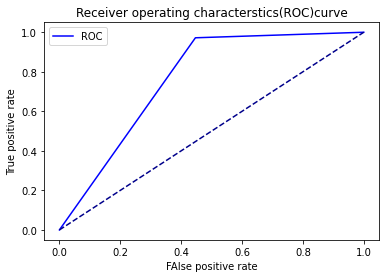

In [160]:
plt.plot(fpr,tpr,color = 'blue',label='ROC')
plt.plot([0,1],[0,1],color = 'darkblue',linestyle='--')
plt.xlabel('FAlse positive rate')
plt.ylabel('True positive rate')
plt.title('Receiver operating characterstics(ROC)curve')
plt.legend()
plt.show()

In [161]:
# lets chk area it is covering(AUC)
auc_score = roc_auc_score(y_test,y_pred)
print(auc_score)

0.762577053092066


In [154]:
# so after tuning, its accuracy is increased by a very few extent so we used our LR model to predict

In [155]:
# saving the model for later prediction
import pickle

In [156]:
filename = 'LOAN APPLICATION.pickle'
pickle.dump(lr,open(filename,'wb'))

# HENCE MY MODEL IS COMPLETE